In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functions import *

## Game 1: A Simple 2-Player Game

In the first game, we'll have two players are next to each other and will choose (at the same time) whether to move forward or backwards. If the players move the same direction then player 1 will "win" (get a positive payout), if the players move in different directions then player 2 will win. The game can be represented with the following table:

$\begin{bmatrix}
1/2 & F    & B    \\
F   & 5,-5 & -3,3 \\
B   & -2,2 & 4,-4
\end{bmatrix}$

Note the values for the table are arbitrary but designed so the game isn't simple (the optimal mixed strategy isn't to play both with a probability of 0.5). To use linear programming to solve this problem, we assume player 1 is using a mixed strategy where they move forward with probability $x_1$ and backward with probability $x_2$. Player 1's goal is to find the mixed strategy which maximizes their expected outcome. This problem can be represented in the following form:

$\begin{align} 
    \text{maximize } &v \\
    \text{subject to: } &5x_1 - 2x_2 \geq v \\
    &-3x_1 + 4x_2 \geq v \\
    &x_1 + x_2 = 1 \\
    &x_1, x_2, v \geq 0
\end{align}$

v denotes the value of the game which is the expected utility of player 1 given they play their optimal strategy. Using slack variables we can manipulate the problem into standard linear programming form: 

$\begin{align}
    \text{minimize } &-v \\
    \text{subject to: } &5x_1 - 2x_2 - x_3 - v = 0 \\
    &-3x_1 + 4x_2 - x_4 - v = 0 \\ 
    &x_1 + x_2 = 1 \\
    &x_1, x_2, x_3, x_4, v \geq 0
\end{align}$

In [77]:
# create arrays for problem
c = np.array([0.0, 0.0, 0.0, 0.0, -1.0])
A = np.array([[5.0, -2.0, -1.0, 0.0, -1.0],
              [-3.0, 4.0, 0.0, -1.0, -1.0],
              [1.0, 1.0, 0.0, 0.0, 0.0]])
b = np.array([0.0, 0.0, 1.0])

# first use affine scaling to solve the problem 
# start by using two phase affine scaling to find initial feasible solution
u = np.ones_like(c)
x = two_phase_affine_scaling(A, b, c, u)

In [78]:
# extract first two values for x_1, x_2 and extract v for value of the game
s, v = x[:2], x[-2] # x[-1] is the slack variable from two phase affine scaling
print(f"Optimal solution x: {s}")
print(f"Value of the game v: {v}")

Optimal solution x: [0.43025628 0.56974472]
Value of the game v: 0.3605109354262859


## Game 2: Rock, Paper, Scissors

The second game is simply rock paper scissors to prove as a sanity check while we scale the games to have more than two decisions per player. The game can be represented with the following table:

$\begin{bmatrix}
    1/2 & R & P & S \\
    R & 0,0 & -1,1 & 1,-1 \\ 
    P & 1,-1 & 0,0 & -1,1 \\
    S & -1,1 & 1,-1 & 0,0
\end{bmatrix}$

Assuming the probabilities player 1 plays rock paper and scissors are $x_1, x_2, x_3$ respectively, solving the problem should result each probability being 1/3. Introducing slack variables we can format the problem as the following linear programming problem: 

$\begin{align}
    \text{minimize } &-v \\
    \text{subject to: } &x_2 - x_3 - v - x_4 = 0 \\
    &-x_1 + x_3 - v - x_5 = 0 \\
    &x_1 - x_2 - v - x_6 = 0 \\
    &x_1 + x_2 + x_3 = 1 \\
    &x_1, \dots, x_6, v \geq 0
\end{align}$

In [79]:
# create arrays for the problem
c = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0])
A = np.array([[0.0, 1.0, -1.0, -1.0, 0.0, 0.0 , -1.0],
              [-1.0, 0.0, 1.0, 0.0, -1.0, 0.0, -1.0],
              [1.0, -1.0, 0.0, 0.0, 0.0, -1.0, -1.0],
              [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]])
b = np.array([0.0, 0.0, 0.0, 1.0])

# solve the problem using affine scaling
u = np.ones_like(c)
x = two_phase_affine_scaling(A, b, c, u)

In [80]:
# extract values for mixed strategy and value of the game
s, v = x[:3], x[-2]  # x[-1] is the slack variable from two phase affine scaling
print(f"Mixed strategy s: {s}")
print(f"Value of the game v: {v}")

Mixed strategy s: [0.3333341 0.3333341 0.3333341]
Value of the game v: 1.0567492056993238e-06


## Game 3: Another 3x3 Game (don't know if necessary)

The third game is another example of a two-player zero-sum game where both players have three options, however this game has more nuance and will result in a mixed strategy not involving uniform probabilities. We arbitrarily chose values for the following matrix representation:

$\begin{bmatrix}
    1/2 & A & B & C \\
    A & 3,-3 & -1,1 & 2,-2 \\
    B & 2,-2 & 0,0 & -2,2 \\
    C & -2,2 & 1,-1 & 1,-1
\end{bmatrix}$

Adding slack variables leads to the standard linear programming form:

$\begin{align}
    \text{minimize } &-v \\
    \text{subject to: } &3x_1 + 2x_2 - 2x_3 - x_4 - v = 0 \\
    &-x_1 + x_3 - x_5 - v = 0 \\
    &2x_1 - 2x_2 + x_3 - x_6 - v = 0 \\
    &x_1 + x_2 + x_3 = 1 \\
    &x_1, \dots, x_6, v \geq 0
\end{align}$


In [81]:
# create arrays for the problem 
c = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0])
A = np.array([[3.0, 2.0, -2.0, -1.0, 0.0, 0.0, -1.0],
              [-1.0, 0.0, 1.0, 0.0, -1.0, 0.0, -1.0],
              [2.0, -2.0, 1.0, 0.0, 0.0, -1.0, -1.0],
              [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]])
b = np.array([0.0, 0.0, 0.0, 1.0])

# solve using two phase affine scaling method
u = np.ones_like(c)
x = two_phase_affine_scaling(A, b, c, u)

In [82]:
# extract values for mixed strategy and value of the game
s, v = x[:3], x[-2]  # x[-1] is the slack variable from two phase affine scaling
print(f"Mixed strategy s: {s}")
print(f"Value of the game v: {v}")

Mixed strategy s: [0.3015564  0.23392841 0.46451563]
Value of the game v: 0.06487559649191608


From Chat: Value of the game should be 0.276, optimal mixed strategy: (.207, .310, .483)

## Game 4: Scaling Game 3 

Since we've established we can use linear programming to find mixed strategies for games with more than two actions for both players, we can see how scaling the payoffs of particular outcomes affects the optimal mixed strategy and value of the game. Note scaling the entire game by positive values doesn't affect the optimal mixed strategy but rather just increases the value of the game. Thus we can examine the rate at which probabilities change subject to an array of transformations. We'll adjust the values in the first row of the game matrix from Game 3 by adding various positive values to player A's outcome while preserving the zero-sum quality of the game. The new matrix representation with $\varepsilon > 0$ is:

$\begin{bmatrix}
    1/2 & A & B & C \\
    A & 3 + \varepsilon,-3 - \varepsilon & -1 + \varepsilon,1 - \varepsilon & 2 + \varepsilon, -2 - \varepsilon \\
    B & 2,-2 & 0,0 & -2,2 \\
    C & -2,2 & 1,-1 & 1,-1
\end{bmatrix}$

The new standard linear programming form for the problem becomes:

$\begin{align}
    \text{minimize } &-v \\
    \text{subject to: } &(3 + \varepsilon)x_1 + 2x_2 - 2x_3 - x_4 - v = 0 \\
    &(-1 + \varepsilon)x_1 + x_3 - x_5 - v = 0 \\
    &(2 + \varepsilon)x_1 - 2x_2 + x_3 - x_6 - v = 0 \\
    &x_1 + x_2 + x_3 = 1 \\
    &x_1, \dots, x_6, v \geq 0
\end{align}$


In [83]:
# creating linspace for epsilon perturbation
ep = np.linspace(0, 2, 200) # epsilon values for perturbation

# create array to store strategy, value of the game, and epsilon
data = np.ndarray([200, 5])
data[:,4] = ep

for i in range(len(ep)):
    c = c = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0])
    A = np.array([[3.0 + ep[i], 2.0, -2.0, -1.0, 0.0, 0.0, -1.0],
                [-1.0 + ep[i], 0.0, 1.0, 0.0, -1.0, 0.0, -1.0],
                [2.0 + ep[i], -2.0, 1.0, 0.0, 0.0, -1.0, -1.0],
                [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]])
    b = np.array([0.0, 0.0, 0.0, 1.0])

    # arbitrary initial vector 
    u = np.ones_like(c)
    x = two_phase_affine_scaling(A, b, c, u)
    s, v = x[:3], x[-2]
    data[i, 0:3] = s
    data[i, 3] = v

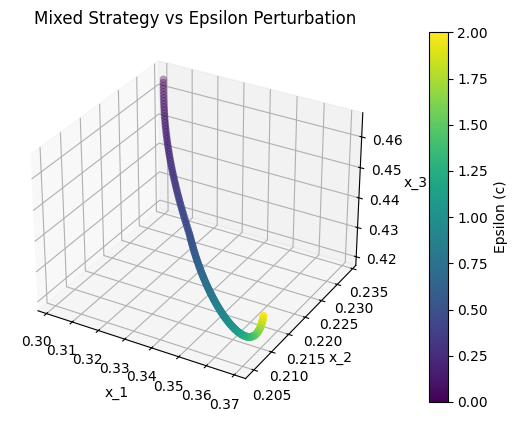

In [90]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c = data[:, 4], cmap='viridis', marker='o')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('x_3')
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.1)
cbar.set_label('Epsilon (c)')

plt.title("Mixed Strategy vs Epsilon Perturbation")
plt.show()